In [1]:
from library_dicom.dicom_processor.model.csv_reader.CsvReader import CsvReader
from library_dicom.dicom_processor.model.csv_reader.RoiFactory import RoiFactory
import matplotlib.pyplot as plt
from library_dicom.dicom_processor.model.csv_reader.MaskBuilder import MaskBuilder

In [2]:
from library_dicom.dicom_processor.model.NiftiBuilder import NiftiBuilder
import os
import json

from library_dicom.dicom_processor.model.Series import Series
from library_dicom.dicom_processor.model.SeriesPT import SeriesPT
from library_dicom.dicom_processor.tools.folders import get_series_path, write_json_file, remove_bi_file
from library_dicom.dicom_processor.tools.series import get_series_object


In [3]:
import numpy as np

### Build mask from roi in CSV file 

In [4]:
mask_build = MaskBuilder(r'C:\Users\wendy\Documents\STAGE\CSV CHALLENGE/11009101406003_apr 14_2010_Saggital.csv', [144, 144, 255])


In [5]:
mask_csv = mask_build.read_csv()

In [6]:
mask_build.number_of_rois

1

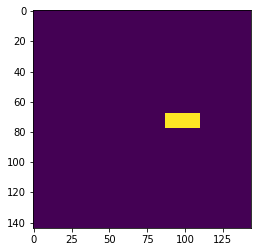

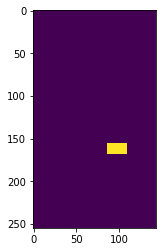

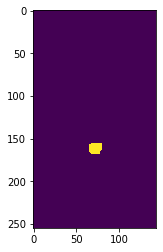

In [8]:
mask_build.show_axial_to_coronal_saggital(mask_csv, 1, 87, 76, 100)

mask_build.show_axial_to_coronal_saggital(mask_csv, 1, 95, 63, 82)

mask_build.show_axial_to_coronal_saggital(mask_csv, 2, 99, 89, 52)


mask_build.show_axial_to_coronal_saggital(mask_csv, 3, 161, 88 , 87 )

### Superposition Nifti/SUV au mask crée 

In [9]:
file = r'C:\Users\wendy\Documents\STAGE\CSV CHALLENGE\1.3.46.670589.28.2.12.4.9177.6631.2.448.0.1271249841'

In [10]:
series_pet = SeriesPT(file)

In [11]:
nifti = series_pet.get_numpy_array()

In [12]:
def calcul_max_mean(nifti, mask_cvs, number_of_roi):
    pixels = []
    for z in range(255):
        for x in range(144):
            for y in range(144):
                if mask_csv[x,y,z, number_of_roi - 1] == number_of_roi : 
                    pixels.append(nifti[ x, y,254 - z])
    print("SUV max : ", np.max(pixels))
    print("SUV mean : ", np.mean(pixels))

In [13]:
calcul_max_mean(nifti, mask_csv, 1)

SUV max :  11.561557074604734
SUV mean :  1.080858546169723


In [18]:
mask_build.read_roi(nifti, mask_csv)

ROI : 1
SUV max :  1.8478228394936183
SUV mean :  0.981795921720745
ROI : 2
SUV max :  12.017083202687408
SUV mean :  2.5649490521362077
ROI : 3
SUV max :  17.192312036790053
SUV mean :  6.751727461396326
ROI : 4
SUV max :  12.466374584791192
SUV mean :  1.2403058358048975
ROI : 5
SUV max :  13.521995013342059
SUV mean :  3.5938658674500603
ROI : 6
SUV max :  2.6337905044574788
SUV mean :  1.0380770223811409
ROI : 7
SUV max :  1.8610716746987601
SUV mean :  0.5423401242273652
ROI : 8
SUV max :  0.9410569711887574
SUV mean :  0.39583647865689114
ROI : 9
SUV max :  1.048996010948296
SUV mean :  0.39452611997044595
ROI : 10
SUV max :  1.0856251435742768
SUV mean :  0.382589134648109
ROI : 11
SUV max :  2.1264380504252793
SUV mean :  0.9961577077920716
ROI : 12
SUV max :  1.6818227278056634
SUV mean :  0.5541910832426757
ROI : 13
SUV max :  2.493508719932447
SUV mean :  1.2137817462718492
ROI : 14
SUV max :  7.545601320952008
SUV mean :  1.1761709514612493
ROI : 15
SUV max :  2.13072443828